In [1]:
from models.DAX import DAX_quantile_regression, DAX_baseline
from functions import get_energy,get_DAX,merge_submissions,check_submission
from functions.prepare_data import split_time
from functions.evaluation import evaluate_horizon
from tqdm import tqdm
from functions import evaluate_energy
from models.energy.energy_models import energy_baseline,energy_LSTM, energy_XGBoost, energy_quantile_regression

In [2]:
# Load data
energydata= get_energy.get()

  0%|          | 0/274 [00:00<?, ?it/s]/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/functions/get_energy.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  energydata = pd.concat([energydata, pd.DataFrame(rawdata, columns=col_names)])
100%|██████████| 274/274 [00:30<00:00,  9.04it/s]


In [3]:
energydata

,gesamt,weekday
date_time,,
2018-12-24 00:00:00,42.02925,0
2018-12-24 01:00:00,39.61025,0
2018-12-24 02:00:00,39.13875,0
2018-12-24 03:00:00,39.42100,0
2018-12-24 04:00:00,40.74775,0
...,...,...
2024-03-20 15:00:00,57.91225,2
2024-03-20 16:00:00,56.96625,2
2024-03-20 17:00:00,58.01400,2


In [4]:
# get mean gesamt of energy data by weekday
energydata.groupby('weekday').mean()

,gesamt
weekday,
0,57.023115
1,58.807948
2,58.926449
3,58.671360
4,57.528987
5,50.051928
6,46.875150


In [5]:
Regression_model = {
    'name': 'Energy QuantReg',
    'function': energy_quantile_regression
}
XGB_model = {
    'name': 'XGBoost',
    'function': energy_XGBoost
}
baseline_model = {
    'name': 'Baseline',
    'function': energy_baseline
}
LSTM_model = {
    'name': 'LSTM',
    'function': energy_LSTM
}



/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5059
Model:                       QuantReg   Bandwidth:                      0.7064
Method:                 Least Squares   Sparsity:                        11.97
Date:                Wed, 20 Mar 2024   No. Observations:                41931
Time:                        21:01:22   Df Residuals:                    41895
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8425      0.177    332.935      0.000      58.496      59.189
weekday       -1.8524      0.015   -126.782      0.000      -1.881      -1.824
month_2        0.4320      0.142      3.037      0.002       0.153       0.711
month_3       -3.2755      0.139    -23.643      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationL

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5056
Model:                       QuantReg   Bandwidth:                      0.7060
Method:                 Least Squares   Sparsity:                        11.95
Date:                Wed, 20 Mar 2024   No. Observations:                42099
Time:                        21:02:10   Df Residuals:                    42063
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8394      0.176    334.123      0.000      58.494      59.185
weekday       -1.8537      0.015   -127.405      0.000      -1.882      -1.825
month_2        0.4287      0.142      3.021      0.003       0.151       0.707
month_3       -3.2732      0.138    -23.680      0.0

/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5058
Model:                       QuantReg   Bandwidth:                      0.7045
Method:                 Least Squares   Sparsity:                        11.92
Date:                Wed, 20 Mar 2024   No. Observations:                42267
Time:                        21:02:41   Df Residuals:                    42231
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8346      0.176    335.169      0.000      58.491      59.179
weekday       -1.8532      0.014   -127.856      0.000      -1.882      -1.825
month_2        0.4372      0.142      3.087      0.002       0.160       0.715
month_3       -3.2689      0.138    -23.692      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5052
Model:                       QuantReg   Bandwidth:                      0.7038
Method:                 Least Squares   Sparsity:                        11.93
Date:                Wed, 20 Mar 2024   No. Observations:                42602
Time:                        21:03:16   Df Residuals:                    42566
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8588      0.175    335.927      0.000      58.515      59.202
weekday       -1.8501      0.014   -128.031      0.000      -1.878      -1.822
month_2        0.4372      0.142      3.084      0.002       0.159       0.715
month_3       -3.2791      0.138    -23.745      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5053
Model:                       QuantReg   Bandwidth:                      0.7024
Method:                 Least Squares   Sparsity:                        11.95
Date:                Wed, 20 Mar 2024   No. Observations:                42770
Time:                        21:03:32   Df Residuals:                    42734
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8517      0.175    335.832      0.000      58.508      59.195
weekday       -1.8520      0.014   -128.222      0.000      -1.880      -1.824
month_2        0.4522      0.142      3.185      0.001       0.174       0.730
month_3       -3.2715      0.138    -23.654      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5055
Model:                       QuantReg   Bandwidth:                      0.7016
Method:                 Least Squares   Sparsity:                        11.97
Date:                Wed, 20 Mar 2024   No. Observations:                42938
Time:                        21:03:52   Df Residuals:                    42902
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8486      0.175    335.701      0.000      58.505      59.192
weekday       -1.8525      0.014   -128.290      0.000      -1.881      -1.824
month_2        0.4455      0.142      3.133      0.002       0.167       0.724
month_3       -3.2749      0.139    -23.639      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationL

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5057
Model:                       QuantReg   Bandwidth:                      0.7010
Method:                 Least Squares   Sparsity:                        11.96
Date:                Wed, 20 Mar 2024   No. Observations:                43106
Time:                        21:04:22   Df Residuals:                    43070
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8369      0.175    336.533      0.000      58.494      59.180
weekday       -1.8539      0.014   -128.813      0.000      -1.882      -1.826
month_2        0.4553      0.142      3.206      0.001       0.177       0.734
month_3       -3.2700      0.138    -23.635      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5061
Model:                       QuantReg   Bandwidth:                      0.7001
Method:                 Least Squares   Sparsity:                        11.96
Date:                Wed, 20 Mar 2024   No. Observations:                43274
Time:                        21:04:51   Df Residuals:                    43238
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8542      0.175    336.944      0.000      58.512      59.197
weekday       -1.8553      0.014   -129.107      0.000      -1.883      -1.827
month_2        0.4439      0.142      3.124      0.002       0.165       0.722
month_3       -3.2748      0.138    -23.660      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5065
Model:                       QuantReg   Bandwidth:                      0.6986
Method:                 Least Squares   Sparsity:                        11.98
Date:                Wed, 20 Mar 2024   No. Observations:                43442
Time:                        21:05:02   Df Residuals:                    43406
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8521      0.175    336.983      0.000      58.510      59.194
weekday       -1.8547      0.014   -129.163      0.000      -1.883      -1.827
month_2        0.4507      0.142      3.168      0.002       0.172       0.729
month_3       -3.2762      0.139    -23.642      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5066
Model:                       QuantReg   Bandwidth:                      0.6975
Method:                 Least Squares   Sparsity:                        11.96
Date:                Wed, 20 Mar 2024   No. Observations:                43610
Time:                        21:05:20   Df Residuals:                    43574
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8520      0.174    337.879      0.000      58.511      59.193
weekday       -1.8530      0.014   -129.468      0.000      -1.881      -1.825
month_2        0.4531      0.142      3.190      0.001       0.175       0.732
month_3       -3.2777      0.138    -23.685      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5069
Model:                       QuantReg   Bandwidth:                      0.6966
Method:                 Least Squares   Sparsity:                        11.92
Date:                Wed, 20 Mar 2024   No. Observations:                43778
Time:                        21:05:38   Df Residuals:                    43742
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8389      0.173    339.390      0.000      58.499      59.179
weekday       -1.8501      0.014   -129.950      0.000      -1.878      -1.822
month_2        0.4556      0.142      3.218      0.001       0.178       0.733
month_3       -3.2764      0.138    -23.756      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5047
Model:                       QuantReg   Bandwidth:                      0.6969
Method:                 Least Squares   Sparsity:                        11.90
Date:                Wed, 20 Mar 2024   No. Observations:                43946
Time:                        21:06:01   Df Residuals:                    43910
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8461      0.173    340.405      0.000      58.507      59.185
weekday       -1.8500      0.014   -130.401      0.000      -1.878      -1.822
month_2        0.4499      0.141      3.183      0.001       0.173       0.727
month_3       -3.2748      0.138    -23.781      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationL

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5016
Model:                       QuantReg   Bandwidth:                      0.7006
Method:                 Least Squares   Sparsity:                        11.96
Date:                Wed, 20 Mar 2024   No. Observations:                44114
Time:                        21:06:40   Df Residuals:                    44078
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.7350      0.173    339.979      0.000      58.396      59.074
weekday       -1.8507      0.014   -130.090      0.000      -1.879      -1.823
month_2        0.5645      0.141      3.993      0.000       0.287       0.842
month_3       -3.1630      0.138    -22.973      0.0

/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5015
Model:                       QuantReg   Bandwidth:                      0.6993
Method:                 Least Squares   Sparsity:                        11.99
Date:                Wed, 20 Mar 2024   No. Observations:                44282
Time:                        21:07:12   Df Residuals:                    44246
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.4687      0.172    340.195      0.000      58.132      58.806
weekday       -1.8515      0.014   -130.020      0.000      -1.879      -1.824
month_2        0.8309      0.140      5.920      0.000       0.556       1.106
month_3       -2.8999      0.137    -21.227      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5022
Model:                       QuantReg   Bandwidth:                      0.6975
Method:                 Least Squares   Sparsity:                        11.95
Date:                Wed, 20 Mar 2024   No. Observations:                44450
Time:                        21:07:45   Df Residuals:                    44414
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.5134      0.170    344.140      0.000      58.180      58.847
weekday       -1.8474      0.014   -130.385      0.000      -1.875      -1.820
month_2        0.7753      0.139      5.594      0.000       0.504       1.047
month_3       -2.9448      0.135    -21.842      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5029
Model:                       QuantReg   Bandwidth:                      0.6960
Method:                 Least Squares   Sparsity:                        11.95
Date:                Wed, 20 Mar 2024   No. Observations:                44618
Time:                        21:08:08   Df Residuals:                    44582
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.5302      0.169    346.942      0.000      58.200      58.861
weekday       -1.8463      0.014   -130.640      0.000      -1.874      -1.819
month_2        0.7515      0.137      5.474      0.000       0.482       1.021
month_3       -2.9627      0.133    -22.195      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5026
Model:                       QuantReg   Bandwidth:                      0.6959
Method:                 Least Squares   Sparsity:                        11.93
Date:                Wed, 20 Mar 2024   No. Observations:                44786
Time:                        21:08:33   Df Residuals:                    44750
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.4093      0.167    348.954      0.000      58.081      58.737
weekday       -1.8450      0.014   -130.949      0.000      -1.873      -1.817
month_2        0.8617      0.136      6.337      0.000       0.595       1.128
month_3       -2.8518      0.132    -21.578      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5029
Model:                       QuantReg   Bandwidth:                      0.6952
Method:                 Least Squares   Sparsity:                        11.95
Date:                Wed, 20 Mar 2024   No. Observations:                44954
Time:                        21:08:50   Df Residuals:                    44918
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.3965      0.167    348.917      0.000      58.068      58.725
weekday       -1.8428      0.014   -130.875      0.000      -1.870      -1.815
month_2        0.7144      0.134      5.320      0.000       0.451       0.978
month_3       -2.8566      0.132    -21.588      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5020
Model:                       QuantReg   Bandwidth:                      0.6965
Method:                 Least Squares   Sparsity:                        12.00
Date:                Wed, 20 Mar 2024   No. Observations:                45122
Time:                        21:09:30   Df Residuals:                    45086
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.3996      0.168    347.750      0.000      58.070      58.729
weekday       -1.8437      0.014   -130.563      0.000      -1.871      -1.816
month_2        0.4741      0.133      3.559      0.000       0.213       0.735
month_3       -2.8708      0.133    -21.593      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5012
Model:                       QuantReg   Bandwidth:                      0.6968
Method:                 Least Squares   Sparsity:                        12.10
Date:                Wed, 20 Mar 2024   No. Observations:                45290
Time:                        21:09:49   Df Residuals:                    45254
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.4187      0.169    345.616      0.000      58.087      58.750
weekday       -1.8470      0.014   -130.020      0.000      -1.875      -1.819
month_2        0.1865      0.133      1.406      0.160      -0.074       0.447
month_3       -2.8672      0.134    -21.398      0.0

/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/energy/energy_models.py:44: SettingWithCopyWarning: 
A value is trying 

Epoch 1/10


2024-03-20 21:16:34.300222: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:16:34.301182: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:16:34.301891: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

466/466 - 5s - loss: 0.8415 - val_loss: 0.7937 - 5s/epoch - 10ms/step
Epoch 2/10
466/466 - 2s - loss: 0.8237 - val_loss: 0.7784 - 2s/epoch - 5ms/step
Epoch 3/10
466/466 - 2s - loss: 0.8077 - val_loss: 0.7817 - 2s/epoch - 5ms/step
Epoch 4/10
466/466 - 3s - loss: 0.7986 - val_loss: 0.7748 - 3s/epoch - 5ms/step
Epoch 5/10
466/466 - 3s - loss: 0.7920 - val_loss: 0.7738 - 3s/epoch - 5ms/step
Epoch 6/10
466/466 - 2s - loss: 0.7879 - val_loss: 0.7741 - 2s/epoch - 5ms/step
Epoch 7/10
466/466 - 3s - loss: 0.7853 - val_loss: 0.7726 - 3s/epoch - 5ms/step
Epoch 8/10
466/466 - 3s - loss: 0.7835 - val_loss: 0.7700 - 3s/epoch - 5ms/step
Epoch 9/10
466/466 - 3s - loss: 0.7821 - val_loss: 0.7675 - 3s/epoch - 6ms/step
Epoch 10/10
466/466 - 2s - loss: 0.7808 - val_loss: 0.7655 - 2s/epoch - 5ms/step


2024-03-20 21:17:01.756280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:17:01.757226: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:17:01.757821: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 406ms/step
Epoch 1/10


2024-03-20 21:17:02.157096: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:17:02.158041: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:17:02.158738: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

468/468 - 4s - loss: 0.8401 - val_loss: 0.7922 - 4s/epoch - 9ms/step
Epoch 2/10
468/468 - 2s - loss: 0.8194 - val_loss: 0.7839 - 2s/epoch - 5ms/step
Epoch 3/10
468/468 - 2s - loss: 0.8059 - val_loss: 0.7802 - 2s/epoch - 5ms/step
Epoch 4/10
468/468 - 2s - loss: 0.7978 - val_loss: 0.7738 - 2s/epoch - 5ms/step
Epoch 5/10
468/468 - 2s - loss: 0.7922 - val_loss: 0.7721 - 2s/epoch - 5ms/step
Epoch 6/10
468/468 - 3s - loss: 0.7884 - val_loss: 0.7724 - 3s/epoch - 6ms/step
Epoch 7/10
468/468 - 3s - loss: 0.7858 - val_loss: 0.7713 - 3s/epoch - 6ms/step
Epoch 8/10
468/468 - 3s - loss: 0.7840 - val_loss: 0.7695 - 3s/epoch - 6ms/step
Epoch 9/10
468/468 - 3s - loss: 0.7826 - val_loss: 0.7669 - 3s/epoch - 6ms/step
Epoch 10/10
468/468 - 3s - loss: 0.7814 - val_loss: 0.7646 - 3s/epoch - 6ms/step


2024-03-20 21:17:29.532128: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:17:29.533108: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:17:29.533702: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 376ms/step
Epoch 1/10


2024-03-20 21:17:29.935361: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:17:29.936131: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:17:29.936941: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

470/470 - 5s - loss: 0.8400 - val_loss: 0.7839 - 5s/epoch - 10ms/step
Epoch 2/10
470/470 - 2s - loss: 0.8193 - val_loss: 0.7734 - 2s/epoch - 5ms/step
Epoch 3/10
470/470 - 2s - loss: 0.8050 - val_loss: 0.7709 - 2s/epoch - 5ms/step
Epoch 4/10
470/470 - 2s - loss: 0.7964 - val_loss: 0.7666 - 2s/epoch - 5ms/step
Epoch 5/10
470/470 - 2s - loss: 0.7904 - val_loss: 0.7644 - 2s/epoch - 5ms/step
Epoch 6/10
470/470 - 2s - loss: 0.7867 - val_loss: 0.7621 - 2s/epoch - 5ms/step
Epoch 7/10
470/470 - 2s - loss: 0.7845 - val_loss: 0.7598 - 2s/epoch - 5ms/step
Epoch 8/10
470/470 - 2s - loss: 0.7830 - val_loss: 0.7580 - 2s/epoch - 5ms/step
Epoch 9/10
470/470 - 2s - loss: 0.7819 - val_loss: 0.7558 - 2s/epoch - 5ms/step
Epoch 10/10
470/470 - 2s - loss: 0.7810 - val_loss: 0.7535 - 2s/epoch - 5ms/step


2024-03-20 21:17:56.241681: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:17:56.242401: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:17:56.243244: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 360ms/step
Epoch 1/10


2024-03-20 21:17:56.623698: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:17:56.624405: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:17:56.625237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

472/472 - 4s - loss: 0.8404 - val_loss: 0.7882 - 4s/epoch - 9ms/step
Epoch 2/10
472/472 - 2s - loss: 0.8235 - val_loss: 0.7832 - 2s/epoch - 5ms/step
Epoch 3/10
472/472 - 2s - loss: 0.8085 - val_loss: 0.7883 - 2s/epoch - 5ms/step
Epoch 4/10
472/472 - 2s - loss: 0.8002 - val_loss: 0.7796 - 2s/epoch - 5ms/step
Epoch 5/10
472/472 - 2s - loss: 0.7934 - val_loss: 0.7772 - 2s/epoch - 5ms/step
Epoch 6/10
472/472 - 2s - loss: 0.7894 - val_loss: 0.7765 - 2s/epoch - 5ms/step
Epoch 7/10
472/472 - 2s - loss: 0.7870 - val_loss: 0.7745 - 2s/epoch - 5ms/step
Epoch 8/10
472/472 - 3s - loss: 0.7854 - val_loss: 0.7724 - 3s/epoch - 6ms/step
Epoch 9/10
472/472 - 3s - loss: 0.7840 - val_loss: 0.7698 - 3s/epoch - 5ms/step
Epoch 10/10
472/472 - 3s - loss: 0.7830 - val_loss: 0.7676 - 3s/epoch - 5ms/step


2024-03-20 21:18:23.594618: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:18:23.595716: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:18:23.596311: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 361ms/step
Epoch 1/10


2024-03-20 21:18:23.984419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:18:23.985304: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:18:23.985979: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

474/474 - 5s - loss: 0.8403 - val_loss: 0.7845 - 5s/epoch - 10ms/step
Epoch 2/10
474/474 - 2s - loss: 0.8200 - val_loss: 0.7747 - 2s/epoch - 5ms/step
Epoch 3/10
474/474 - 2s - loss: 0.8056 - val_loss: 0.7747 - 2s/epoch - 5ms/step
Epoch 4/10
474/474 - 3s - loss: 0.7972 - val_loss: 0.7706 - 3s/epoch - 7ms/step
Epoch 5/10
474/474 - 4s - loss: 0.7919 - val_loss: 0.7686 - 4s/epoch - 8ms/step
Epoch 6/10
474/474 - 3s - loss: 0.7887 - val_loss: 0.7664 - 3s/epoch - 6ms/step
Epoch 7/10
474/474 - 3s - loss: 0.7869 - val_loss: 0.7647 - 3s/epoch - 5ms/step
Epoch 8/10
474/474 - 3s - loss: 0.7855 - val_loss: 0.7627 - 3s/epoch - 5ms/step
Epoch 9/10
474/474 - 3s - loss: 0.7845 - val_loss: 0.7604 - 3s/epoch - 5ms/step
Epoch 10/10
474/474 - 3s - loss: 0.7837 - val_loss: 0.7577 - 3s/epoch - 5ms/step


2024-03-20 21:18:54.218465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:18:54.219233: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:18:54.220027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 384ms/step
Epoch 1/10


2024-03-20 21:18:54.644837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:18:54.645808: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:18:54.646592: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

475/475 - 5s - loss: 0.8419 - val_loss: 0.7866 - 5s/epoch - 10ms/step
Epoch 2/10
475/475 - 3s - loss: 0.8224 - val_loss: 0.7768 - 3s/epoch - 6ms/step
Epoch 3/10
475/475 - 3s - loss: 0.8067 - val_loss: 0.7827 - 3s/epoch - 6ms/step
Epoch 4/10
475/475 - 3s - loss: 0.7979 - val_loss: 0.7781 - 3s/epoch - 6ms/step
Epoch 5/10
475/475 - 3s - loss: 0.7923 - val_loss: 0.7766 - 3s/epoch - 6ms/step
Epoch 6/10
475/475 - 3s - loss: 0.7888 - val_loss: 0.7758 - 3s/epoch - 6ms/step
Epoch 7/10
475/475 - 3s - loss: 0.7869 - val_loss: 0.7731 - 3s/epoch - 6ms/step
Epoch 8/10
475/475 - 3s - loss: 0.7853 - val_loss: 0.7702 - 3s/epoch - 6ms/step
Epoch 9/10
475/475 - 3s - loss: 0.7840 - val_loss: 0.7678 - 3s/epoch - 6ms/step
Epoch 10/10
475/475 - 3s - loss: 0.7830 - val_loss: 0.7653 - 3s/epoch - 6ms/step


2024-03-20 21:19:24.736106: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:19:24.737190: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:19:24.737857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 413ms/step
Epoch 1/10


2024-03-20 21:19:25.184093: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:19:25.184988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:19:25.185563: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

477/477 - 5s - loss: 0.8410 - val_loss: 0.7921 - 5s/epoch - 10ms/step
Epoch 2/10
477/477 - 2s - loss: 0.8227 - val_loss: 0.7813 - 2s/epoch - 5ms/step
Epoch 3/10
477/477 - 2s - loss: 0.8073 - val_loss: 0.7820 - 2s/epoch - 5ms/step
Epoch 4/10
477/477 - 2s - loss: 0.7990 - val_loss: 0.7761 - 2s/epoch - 5ms/step
Epoch 5/10
477/477 - 3s - loss: 0.7932 - val_loss: 0.7734 - 3s/epoch - 7ms/step
Epoch 6/10
477/477 - 3s - loss: 0.7895 - val_loss: 0.7722 - 3s/epoch - 7ms/step
Epoch 7/10
477/477 - 3s - loss: 0.7872 - val_loss: 0.7705 - 3s/epoch - 5ms/step
Epoch 8/10
477/477 - 3s - loss: 0.7856 - val_loss: 0.7678 - 3s/epoch - 5ms/step
Epoch 9/10
477/477 - 3s - loss: 0.7844 - val_loss: 0.7658 - 3s/epoch - 5ms/step
Epoch 10/10
477/477 - 2s - loss: 0.7833 - val_loss: 0.7637 - 2s/epoch - 5ms/step


2024-03-20 21:19:54.262881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:19:54.263712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:19:54.264559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 379ms/step
Epoch 1/10


2024-03-20 21:19:54.672328: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:19:54.673305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:19:54.673878: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

479/479 - 5s - loss: 0.8415 - val_loss: 0.7862 - 5s/epoch - 10ms/step
Epoch 2/10
479/479 - 3s - loss: 0.8225 - val_loss: 0.7752 - 3s/epoch - 6ms/step
Epoch 3/10
479/479 - 3s - loss: 0.8067 - val_loss: 0.7760 - 3s/epoch - 6ms/step
Epoch 4/10
479/479 - 3s - loss: 0.7978 - val_loss: 0.7706 - 3s/epoch - 6ms/step
Epoch 5/10
479/479 - 3s - loss: 0.7919 - val_loss: 0.7681 - 3s/epoch - 6ms/step
Epoch 6/10
479/479 - 3s - loss: 0.7883 - val_loss: 0.7655 - 3s/epoch - 6ms/step
Epoch 7/10
479/479 - 3s - loss: 0.7862 - val_loss: 0.7631 - 3s/epoch - 6ms/step
Epoch 8/10
479/479 - 3s - loss: 0.7848 - val_loss: 0.7611 - 3s/epoch - 6ms/step
Epoch 9/10
479/479 - 3s - loss: 0.7838 - val_loss: 0.7595 - 3s/epoch - 6ms/step
Epoch 10/10
479/479 - 3s - loss: 0.7828 - val_loss: 0.7572 - 3s/epoch - 5ms/step


2024-03-20 21:20:23.982013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:20:23.982842: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:20:23.983448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 359ms/step
Epoch 1/10


2024-03-20 21:20:24.369441: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:20:24.370403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:20:24.371145: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

481/481 - 5s - loss: 0.8419 - val_loss: 0.7933 - 5s/epoch - 10ms/step
Epoch 2/10
481/481 - 2s - loss: 0.8246 - val_loss: 0.7795 - 2s/epoch - 5ms/step
Epoch 3/10
481/481 - 2s - loss: 0.8084 - val_loss: 0.7840 - 2s/epoch - 5ms/step
Epoch 4/10
481/481 - 2s - loss: 0.7994 - val_loss: 0.7775 - 2s/epoch - 5ms/step
Epoch 5/10
481/481 - 2s - loss: 0.7931 - val_loss: 0.7737 - 2s/epoch - 5ms/step
Epoch 6/10
481/481 - 2s - loss: 0.7890 - val_loss: 0.7730 - 2s/epoch - 5ms/step
Epoch 7/10
481/481 - 2s - loss: 0.7866 - val_loss: 0.7713 - 2s/epoch - 5ms/step
Epoch 8/10
481/481 - 2s - loss: 0.7850 - val_loss: 0.7689 - 2s/epoch - 5ms/step
Epoch 9/10
481/481 - 2s - loss: 0.7837 - val_loss: 0.7662 - 2s/epoch - 5ms/step
Epoch 10/10
481/481 - 2s - loss: 0.7826 - val_loss: 0.7642 - 2s/epoch - 5ms/step


2024-03-20 21:20:51.512840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:20:51.513482: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:20:51.514274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 369ms/step
Epoch 1/10


2024-03-20 21:20:51.919546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:20:51.920497: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:20:51.921118: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

483/483 - 5s - loss: 0.8423 - val_loss: 0.7933 - 5s/epoch - 10ms/step
Epoch 2/10
483/483 - 3s - loss: 0.8231 - val_loss: 0.7786 - 3s/epoch - 6ms/step
Epoch 3/10
483/483 - 3s - loss: 0.8073 - val_loss: 0.7790 - 3s/epoch - 6ms/step
Epoch 4/10
483/483 - 3s - loss: 0.7985 - val_loss: 0.7737 - 3s/epoch - 6ms/step
Epoch 5/10
483/483 - 3s - loss: 0.7927 - val_loss: 0.7710 - 3s/epoch - 6ms/step
Epoch 6/10
483/483 - 3s - loss: 0.7888 - val_loss: 0.7703 - 3s/epoch - 6ms/step
Epoch 7/10
483/483 - 3s - loss: 0.7864 - val_loss: 0.7679 - 3s/epoch - 6ms/step
Epoch 8/10
483/483 - 3s - loss: 0.7847 - val_loss: 0.7645 - 3s/epoch - 6ms/step
Epoch 9/10
483/483 - 3s - loss: 0.7833 - val_loss: 0.7609 - 3s/epoch - 6ms/step
Epoch 10/10
483/483 - 3s - loss: 0.7821 - val_loss: 0.7578 - 3s/epoch - 6ms/step


2024-03-20 21:21:21.976651: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:21:21.977437: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:21:21.978147: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 358ms/step
Epoch 1/10


2024-03-20 21:21:22.366193: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:21:22.366846: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:21:22.367710: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

485/485 - 5s - loss: 0.8426 - val_loss: 0.7928 - 5s/epoch - 10ms/step
Epoch 2/10
485/485 - 2s - loss: 0.8219 - val_loss: 0.7795 - 2s/epoch - 5ms/step
Epoch 3/10
485/485 - 3s - loss: 0.8049 - val_loss: 0.7788 - 3s/epoch - 5ms/step
Epoch 4/10
485/485 - 2s - loss: 0.7960 - val_loss: 0.7754 - 2s/epoch - 5ms/step
Epoch 5/10
485/485 - 2s - loss: 0.7908 - val_loss: 0.7735 - 2s/epoch - 5ms/step
Epoch 6/10
485/485 - 2s - loss: 0.7878 - val_loss: 0.7707 - 2s/epoch - 5ms/step
Epoch 7/10
485/485 - 2s - loss: 0.7859 - val_loss: 0.7673 - 2s/epoch - 5ms/step
Epoch 8/10
485/485 - 2s - loss: 0.7846 - val_loss: 0.7642 - 2s/epoch - 5ms/step
Epoch 9/10
485/485 - 2s - loss: 0.7835 - val_loss: 0.7620 - 2s/epoch - 5ms/step
Epoch 10/10
485/485 - 2s - loss: 0.7826 - val_loss: 0.7603 - 2s/epoch - 5ms/step


2024-03-20 21:21:49.003504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:21:49.004403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:21:49.005165: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 380ms/step
Epoch 1/10


2024-03-20 21:21:49.416332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:21:49.417167: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:21:49.417923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

487/487 - 5s - loss: 0.8422 - val_loss: 0.7993 - 5s/epoch - 10ms/step
Epoch 2/10
487/487 - 3s - loss: 0.8237 - val_loss: 0.7882 - 3s/epoch - 6ms/step
Epoch 3/10
487/487 - 3s - loss: 0.8057 - val_loss: 0.7864 - 3s/epoch - 6ms/step
Epoch 4/10
487/487 - 3s - loss: 0.7960 - val_loss: 0.7825 - 3s/epoch - 6ms/step
Epoch 5/10
487/487 - 3s - loss: 0.7904 - val_loss: 0.7804 - 3s/epoch - 6ms/step
Epoch 6/10
487/487 - 3s - loss: 0.7873 - val_loss: 0.7766 - 3s/epoch - 6ms/step
Epoch 7/10
487/487 - 3s - loss: 0.7854 - val_loss: 0.7732 - 3s/epoch - 6ms/step
Epoch 8/10
487/487 - 3s - loss: 0.7841 - val_loss: 0.7708 - 3s/epoch - 6ms/step
Epoch 9/10
487/487 - 3s - loss: 0.7831 - val_loss: 0.7682 - 3s/epoch - 6ms/step
Epoch 10/10
487/487 - 3s - loss: 0.7823 - val_loss: 0.7664 - 3s/epoch - 6ms/step


2024-03-20 21:22:20.134813: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:22:20.135721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:22:20.136459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 374ms/step
Epoch 1/10


2024-03-20 21:22:20.536208: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:22:20.537136: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:22:20.537849: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

488/488 - 5s - loss: 0.8423 - val_loss: 0.7952 - 5s/epoch - 10ms/step
Epoch 2/10
488/488 - 2s - loss: 0.8242 - val_loss: 0.7805 - 2s/epoch - 5ms/step
Epoch 3/10
488/488 - 2s - loss: 0.8070 - val_loss: 0.7831 - 2s/epoch - 5ms/step
Epoch 4/10
488/488 - 2s - loss: 0.7978 - val_loss: 0.7798 - 2s/epoch - 5ms/step
Epoch 5/10
488/488 - 2s - loss: 0.7921 - val_loss: 0.7786 - 2s/epoch - 5ms/step
Epoch 6/10
488/488 - 2s - loss: 0.7887 - val_loss: 0.7769 - 2s/epoch - 5ms/step
Epoch 7/10
488/488 - 2s - loss: 0.7868 - val_loss: 0.7746 - 2s/epoch - 5ms/step
Epoch 8/10
488/488 - 2s - loss: 0.7854 - val_loss: 0.7713 - 2s/epoch - 5ms/step
Epoch 9/10
488/488 - 2s - loss: 0.7843 - val_loss: 0.7691 - 2s/epoch - 5ms/step
Epoch 10/10
488/488 - 2s - loss: 0.7834 - val_loss: 0.7667 - 2s/epoch - 5ms/step


2024-03-20 21:22:47.456447: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:22:47.457533: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:22:47.458133: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 370ms/step
Epoch 1/10


2024-03-20 21:22:47.870767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:22:47.871656: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:22:47.872246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

490/490 - 5s - loss: 0.8412 - val_loss: 0.8044 - 5s/epoch - 9ms/step
Epoch 2/10
490/490 - 2s - loss: 0.8232 - val_loss: 0.7954 - 2s/epoch - 5ms/step
Epoch 3/10
490/490 - 3s - loss: 0.8073 - val_loss: 0.7971 - 3s/epoch - 5ms/step
Epoch 4/10
490/490 - 2s - loss: 0.7994 - val_loss: 0.7918 - 2s/epoch - 5ms/step
Epoch 5/10
490/490 - 3s - loss: 0.7941 - val_loss: 0.7891 - 3s/epoch - 5ms/step
Epoch 6/10
490/490 - 3s - loss: 0.7905 - val_loss: 0.7862 - 3s/epoch - 6ms/step
Epoch 7/10
490/490 - 3s - loss: 0.7881 - val_loss: 0.7820 - 3s/epoch - 5ms/step
Epoch 8/10
490/490 - 3s - loss: 0.7864 - val_loss: 0.7787 - 3s/epoch - 5ms/step
Epoch 9/10
490/490 - 3s - loss: 0.7853 - val_loss: 0.7766 - 3s/epoch - 5ms/step
Epoch 10/10
490/490 - 3s - loss: 0.7844 - val_loss: 0.7748 - 3s/epoch - 5ms/step


2024-03-20 21:23:15.744858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:23:15.745541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:23:15.746164: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 379ms/step
Epoch 1/10


2024-03-20 21:23:16.166458: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:23:16.167179: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:23:16.168061: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

492/492 - 5s - loss: 0.8415 - val_loss: 0.7993 - 5s/epoch - 11ms/step
Epoch 2/10
492/492 - 3s - loss: 0.8259 - val_loss: 0.7776 - 3s/epoch - 6ms/step
Epoch 3/10
492/492 - 3s - loss: 0.8112 - val_loss: 0.7709 - 3s/epoch - 6ms/step
Epoch 4/10
492/492 - 3s - loss: 0.8017 - val_loss: 0.7669 - 3s/epoch - 6ms/step
Epoch 5/10
492/492 - 3s - loss: 0.7961 - val_loss: 0.7657 - 3s/epoch - 6ms/step
Epoch 6/10
492/492 - 3s - loss: 0.7928 - val_loss: 0.7647 - 3s/epoch - 6ms/step
Epoch 7/10
492/492 - 3s - loss: 0.7905 - val_loss: 0.7632 - 3s/epoch - 6ms/step
Epoch 8/10
492/492 - 3s - loss: 0.7887 - val_loss: 0.7615 - 3s/epoch - 6ms/step
Epoch 9/10
492/492 - 3s - loss: 0.7873 - val_loss: 0.7599 - 3s/epoch - 6ms/step
Epoch 10/10
492/492 - 3s - loss: 0.7860 - val_loss: 0.7584 - 3s/epoch - 6ms/step


2024-03-20 21:23:47.060641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:23:47.061553: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:23:47.062163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 372ms/step
Epoch 1/10


2024-03-20 21:23:47.472371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:23:47.473486: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:23:47.474171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

494/494 - 5s - loss: 0.8412 - val_loss: 0.7965 - 5s/epoch - 10ms/step
Epoch 2/10
494/494 - 3s - loss: 0.8246 - val_loss: 0.7728 - 3s/epoch - 6ms/step
Epoch 3/10
494/494 - 3s - loss: 0.8115 - val_loss: 0.7645 - 3s/epoch - 6ms/step
Epoch 4/10
494/494 - 3s - loss: 0.8032 - val_loss: 0.7594 - 3s/epoch - 6ms/step
Epoch 5/10
494/494 - 3s - loss: 0.7980 - val_loss: 0.7579 - 3s/epoch - 6ms/step
Epoch 6/10
494/494 - 3s - loss: 0.7945 - val_loss: 0.7571 - 3s/epoch - 6ms/step
Epoch 7/10
494/494 - 3s - loss: 0.7921 - val_loss: 0.7560 - 3s/epoch - 6ms/step
Epoch 8/10
494/494 - 3s - loss: 0.7902 - val_loss: 0.7549 - 3s/epoch - 6ms/step
Epoch 9/10
494/494 - 3s - loss: 0.7886 - val_loss: 0.7539 - 3s/epoch - 6ms/step
Epoch 10/10
494/494 - 3s - loss: 0.7872 - val_loss: 0.7528 - 3s/epoch - 6ms/step


2024-03-20 21:24:18.103669: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:24:18.104699: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:24:18.105297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 371ms/step
Epoch 1/10


2024-03-20 21:24:18.509191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:24:18.510171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:24:18.510745: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

496/496 - 5s - loss: 0.8421 - val_loss: 0.8016 - 5s/epoch - 10ms/step
Epoch 2/10
496/496 - 3s - loss: 0.8272 - val_loss: 0.7786 - 3s/epoch - 5ms/step
Epoch 3/10
496/496 - 3s - loss: 0.8133 - val_loss: 0.7613 - 3s/epoch - 5ms/step
Epoch 4/10
496/496 - 3s - loss: 0.8047 - val_loss: 0.7531 - 3s/epoch - 5ms/step
Epoch 5/10
496/496 - 3s - loss: 0.7992 - val_loss: 0.7504 - 3s/epoch - 5ms/step
Epoch 6/10
496/496 - 3s - loss: 0.7957 - val_loss: 0.7494 - 3s/epoch - 5ms/step
Epoch 7/10
496/496 - 3s - loss: 0.7932 - val_loss: 0.7487 - 3s/epoch - 5ms/step
Epoch 8/10
496/496 - 3s - loss: 0.7912 - val_loss: 0.7479 - 3s/epoch - 5ms/step
Epoch 9/10
496/496 - 3s - loss: 0.7896 - val_loss: 0.7471 - 3s/epoch - 5ms/step
Epoch 10/10
496/496 - 3s - loss: 0.7881 - val_loss: 0.7466 - 3s/epoch - 5ms/step


2024-03-20 21:24:47.671989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:24:47.673021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:24:47.673681: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 367ms/step
Epoch 1/10


2024-03-20 21:24:48.066450: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:24:48.067320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:24:48.067956: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

498/498 - 5s - loss: 0.8412 - val_loss: 0.7976 - 5s/epoch - 10ms/step
Epoch 2/10
498/498 - 3s - loss: 0.8247 - val_loss: 0.7707 - 3s/epoch - 6ms/step
Epoch 3/10
498/498 - 3s - loss: 0.8112 - val_loss: 0.7539 - 3s/epoch - 6ms/step
Epoch 4/10
498/498 - 3s - loss: 0.8033 - val_loss: 0.7469 - 3s/epoch - 6ms/step
Epoch 5/10
498/498 - 3s - loss: 0.7980 - val_loss: 0.7435 - 3s/epoch - 6ms/step
Epoch 6/10
498/498 - 3s - loss: 0.7945 - val_loss: 0.7418 - 3s/epoch - 6ms/step
Epoch 7/10
498/498 - 3s - loss: 0.7921 - val_loss: 0.7407 - 3s/epoch - 6ms/step
Epoch 8/10
498/498 - 3s - loss: 0.7902 - val_loss: 0.7398 - 3s/epoch - 6ms/step
Epoch 9/10
498/498 - 3s - loss: 0.7886 - val_loss: 0.7395 - 3s/epoch - 6ms/step
Epoch 10/10
498/498 - 3s - loss: 0.7871 - val_loss: 0.7390 - 3s/epoch - 6ms/step


2024-03-20 21:25:19.391730: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:25:19.392776: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:25:19.393427: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 372ms/step
Epoch 1/10


2024-03-20 21:25:19.812601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:25:19.813656: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:25:19.814231: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

500/500 - 5s - loss: 0.8416 - val_loss: 0.8044 - 5s/epoch - 10ms/step
Epoch 2/10
500/500 - 3s - loss: 0.8250 - val_loss: 0.7810 - 3s/epoch - 6ms/step
Epoch 3/10
500/500 - 3s - loss: 0.8121 - val_loss: 0.7651 - 3s/epoch - 6ms/step
Epoch 4/10
500/500 - 3s - loss: 0.8045 - val_loss: 0.7562 - 3s/epoch - 6ms/step
Epoch 5/10
500/500 - 3s - loss: 0.7993 - val_loss: 0.7524 - 3s/epoch - 6ms/step
Epoch 6/10
500/500 - 3s - loss: 0.7959 - val_loss: 0.7505 - 3s/epoch - 6ms/step
Epoch 7/10
500/500 - 3s - loss: 0.7933 - val_loss: 0.7491 - 3s/epoch - 6ms/step
Epoch 8/10
500/500 - 3s - loss: 0.7912 - val_loss: 0.7481 - 3s/epoch - 6ms/step
Epoch 9/10
500/500 - 3s - loss: 0.7894 - val_loss: 0.7474 - 3s/epoch - 6ms/step
Epoch 10/10
500/500 - 3s - loss: 0.7878 - val_loss: 0.7467 - 3s/epoch - 6ms/step


2024-03-20 21:25:51.560323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:25:51.561263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:25:51.561862: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 367ms/step
Epoch 1/10


2024-03-20 21:25:51.961214: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:25:51.962150: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:25:51.962747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

502/502 - 5s - loss: 0.8415 - val_loss: 0.8062 - 5s/epoch - 9ms/step
Epoch 2/10
502/502 - 3s - loss: 0.8265 - val_loss: 0.7796 - 3s/epoch - 5ms/step
Epoch 3/10
502/502 - 3s - loss: 0.8133 - val_loss: 0.7609 - 3s/epoch - 5ms/step
Epoch 4/10
502/502 - 3s - loss: 0.8054 - val_loss: 0.7517 - 3s/epoch - 5ms/step
Epoch 5/10
502/502 - 3s - loss: 0.8002 - val_loss: 0.7477 - 3s/epoch - 5ms/step
Epoch 6/10
502/502 - 3s - loss: 0.7968 - val_loss: 0.7459 - 3s/epoch - 5ms/step
Epoch 7/10
502/502 - 3s - loss: 0.7945 - val_loss: 0.7447 - 3s/epoch - 5ms/step
Epoch 8/10
502/502 - 3s - loss: 0.7926 - val_loss: 0.7439 - 3s/epoch - 5ms/step
Epoch 9/10
502/502 - 3s - loss: 0.7912 - val_loss: 0.7429 - 3s/epoch - 5ms/step
Epoch 10/10
502/502 - 3s - loss: 0.7899 - val_loss: 0.7424 - 3s/epoch - 5ms/step


2024-03-20 21:26:19.657090: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:26:19.658141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:26:19.658752: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 372ms/step
Epoch 1/10


2024-03-20 21:26:20.059094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:26:20.060002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:26:20.060708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

503/503 - 5s - loss: 0.8419 - val_loss: 0.8069 - 5s/epoch - 10ms/step
Epoch 2/10
503/503 - 3s - loss: 0.8254 - val_loss: 0.7812 - 3s/epoch - 5ms/step
Epoch 3/10
503/503 - 3s - loss: 0.8116 - val_loss: 0.7636 - 3s/epoch - 6ms/step
Epoch 4/10
503/503 - 3s - loss: 0.8032 - val_loss: 0.7544 - 3s/epoch - 5ms/step
Epoch 5/10
503/503 - 3s - loss: 0.7978 - val_loss: 0.7504 - 3s/epoch - 5ms/step
Epoch 6/10
503/503 - 3s - loss: 0.7942 - val_loss: 0.7482 - 3s/epoch - 5ms/step
Epoch 7/10
503/503 - 3s - loss: 0.7916 - val_loss: 0.7466 - 3s/epoch - 6ms/step
Epoch 8/10
503/503 - 3s - loss: 0.7897 - val_loss: 0.7456 - 3s/epoch - 6ms/step
Epoch 9/10
503/503 - 3s - loss: 0.7881 - val_loss: 0.7450 - 3s/epoch - 6ms/step
Epoch 10/10
503/503 - 3s - loss: 0.7868 - val_loss: 0.7445 - 3s/epoch - 6ms/step


2024-03-20 21:26:50.859786: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-20 21:26:50.860857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-20 21:26:50.861459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 389ms/step


/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldc

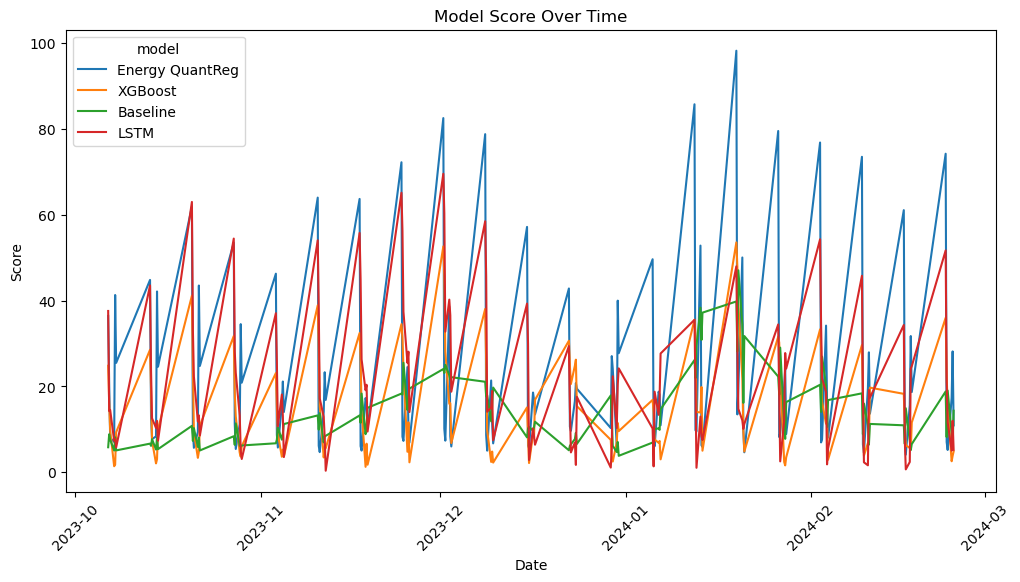

In [7]:
start_date = '2023-10-01'
end_date = '2024-02-28'

evaluations, grouped_scores = evaluate_energy.evaluate(Regression_model, XGB_model,baseline_model,LSTM_model, df=energydata, start_date= start_date, end_date= end_date, horizon_format="hours")

In [8]:
# sum of scores
grouped_scores

mean     median        std
model           horizon                                 
Baseline        36 hour  15.390655  13.242751   8.659751
                40 hour  12.341132   9.923417   6.422774
                44 hour  17.319586  14.911173  10.182438
                60 hour  12.334644   9.224261   9.254899
                64 hour  11.055572   8.997711   6.155977
                68 hour  13.759547  11.766283   8.816876
Energy QuantReg 36 hour  62.553334  63.708044  19.983871
                40 hour  10.248200   8.706202   5.055311
                44 hour   7.960487   6.049900   4.956821
                60 hour  20.827411  17.343950  12.888415
                64 hour  23.398504  21.143012  11.850490
                68 hour  14.235814  13.469714   7.314831
LSTM            36 hour  43.940526  45.786874  16.989075
                40 hour  27.205491  25.544385  15.718940
                44 hour  14.976439  14.513993  10.479313
                60 hour  13.297468  12.082594   8.356881
                64 hour  14.988629  13.096927   9.143958
                68 hour  11.903130   8.546557   8.186197
XGBoost         36 hour  31.143436  31.748800  11.251313
                40 hour  23.494903  24.319515  11.086971
                44 hour  13.873574  13.028820   9.172971
                60 hour   7.364476   4.769717   6.662761
                64 hour   8.413539   6.647876   6.196162
                68 hour   7.414653   5.593474   5.135916

In [9]:
# mean of scores by model
grouped_scores.groupby('model').mean()

,mean,median,std
model,,,
Baseline,13.700189,11.344266,8.248786
Energy QuantReg,23.203958,21.736804,10.341623
LSTM,21.051947,19.928555,11.479061
XGBoost,15.284097,14.351367,8.251015


In [48]:
for evaluation in evaluations:
    print(evaluation['model'])
    print(evaluation['score'].sum())

0    Energy QuantReg
1    Energy QuantReg
2    Energy QuantReg
3    Energy QuantReg
4    Energy QuantReg
          ...       
1    Energy QuantReg
2    Energy QuantReg
3    Energy QuantReg
4    Energy QuantReg
5    Energy QuantReg
Name: model, Length: 126, dtype: object
2923.6987577327955
0    XGBoost
1    XGBoost
2    XGBoost
3    XGBoost
4    XGBoost
      ...   
1    XGBoost
2    XGBoost
3    XGBoost
4    XGBoost
5    XGBoost
Name: model, Length: 126, dtype: object
1925.7962085266113
0    Baseline
1    Baseline
2    Baseline
3    Baseline
4    Baseline
       ...   
1    Baseline
2    Baseline
3    Baseline
4    Baseline
5    Baseline
Name: model, Length: 126, dtype: object
1726.2238328125
0    LSTM
1    LSTM
2    LSTM
3    LSTM
4    LSTM
     ... 
1    LSTM
2    LSTM
3    LSTM
4    LSTM
5    LSTM
Name: model, Length: 126, dtype: object
2652.545328224182


In [12]:
ensemble_df['ensemble_score'].sum()

1826.0100206695554

In [95]:
evaluations[2]

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,gesamt,weekday,score,model
0,2023-10-05,energy,36 hour,51.663581,58.836125,62.029375,67.408812,73.728750,2023-10-06 12:00:00+02:00,61.60050,4,5.818477,Baseline
1,2023-10-05,energy,40 hour,51.099769,55.623812,59.109625,65.576625,73.522131,2023-10-06 16:00:00+02:00,56.36900,4,8.838149,Baseline
2,2023-10-05,energy,44 hour,47.723500,50.325063,52.926375,57.789000,63.869181,2023-10-06 20:00:00+02:00,55.98850,4,7.601378,Baseline
3,2023-10-05,energy,60 hour,45.991231,49.727625,52.442000,57.023125,62.447850,2023-10-07 12:00:00+02:00,51.85575,5,5.056831,Baseline
4,2023-10-05,energy,64 hour,44.648862,47.490000,50.906875,56.501312,65.587450,2023-10-07 16:00:00+02:00,48.32600,5,8.133461,Baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2024-02-22,energy,40 hour,51.099769,55.623812,58.909125,63.497125,69.410781,2024-02-23 16:00:00+01:00,62.25275,4,8.195832,Baseline
2,2024-02-22,energy,44 hour,47.723500,50.446375,52.847750,56.146125,59.750081,2024-02-23 20:00:00+01:00,60.04600,4,19.041042,Baseline
3,2024-02-22,energy,60 hour,45.991231,49.727625,51.973625,54.529750,59.947700,2024-02-24 12:00:00+01:00,55.71950,5,9.224261,Baseline
4,2024-02-22,energy,64 hour,44.648862,47.490000,50.579125,56.024000,61.241231,2024-02-24 16:00:00+01:00,51.78300,5,6.300493,Baseline


In [96]:
evaluate_energy.process_evaluation_results(evaluations)

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

Only evaluate for ensembles between basline and LSTM

In [71]:
import numpy as np
from functions.naive_ensemble import ensemble

In [87]:
weight_i=np.arange(0,1.1,0.01)
weight_store = dict()

In [88]:
for i in weight_i:
    df_models = [evaluations[1], evaluations[2]]  # Your DataFrames containing the forecasts
    weights = [i, 1-i]  # Weights for each model's forecast
    ensemble_df= ensemble(df_models, weights)
    for index, row in ensemble_df.iterrows():
        quantile_preds = row[['q0.025', 'q0.25', 'q0.5', 'q0.75', 'q0.975']]
        observation = row['gesamt']
        score = evaluate_horizon(quantile_preds, observation)
        ensemble_df.at[index, 'score'] = score
    print(i, ensemble_df['score'].sum())
    # store the score
    weight_store[i,1-i] = ensemble_df['score'].sum()
    

0.0 1594.2178612499997
0.01 1588.7381393121
0.02 1583.2584173741993
0.03 1577.7787051369553
0.04 1572.2989734983992
0.05 1566.819232221772
0.06 1561.33954902391
0.07 1555.8597969826844
0.08 1550.3800857467966
0.09 1544.900276127483
0.1 1539.4206031935419
0.11 1533.9409057263288
0.12 1528.4612367978195
0.13 1522.981579384927
0.14 1517.501732715367
0.15 1512.571900486153
0.16 1509.639898721988
0.17 1506.7076881746739
0.18 1503.7754005227896
0.19 1500.8434613435015
0.2 1497.9111756943348
0.21 1496.7640629692862
0.22 1496.4054422375693
0.23 1496.0469286511623
0.24 1495.6887755536468
0.25 1495.3302239156335
0.26 1494.9720517923163
0.27 1494.6131606939302
0.28 1494.2548694090062
0.29 1493.8968645124787
0.3 1493.5378602606359
0.31 1493.1797091658361
0.32 1492.8213668116532
0.33 1492.4625868640094
0.34 1492.1043756877277
0.35000000000000003 1491.7462386119394
0.36 1491.3872303546623
0.37 1491.0291173114679
0.38 1490.670942184076
0.39 1490.3127089779168
0.4 1489.9538008564455
0.4100000000000000

In [89]:
weight_store

{(0.0, 1.0): 1594.2178612499997,
 (0.01, 0.99): 1588.7381393121,
 (0.02, 0.98): 1583.2584173741993,
 (0.03, 0.97): 1577.7787051369553,
 (0.04, 0.96): 1572.2989734983992,
 (0.05, 0.95): 1566.819232221772,
 (0.06, 0.94): 1561.33954902391,
 (0.07, 0.9299999999999999): 1555.8597969826844,
 (0.08, 0.92): 1550.3800857467966,
 (0.09, 0.91): 1544.900276127483,
 (0.1, 0.9): 1539.4206031935419,
 (0.11, 0.89): 1533.9409057263288,
 (0.12, 0.88): 1528.4612367978195,
 (0.13, 0.87): 1522.981579384927,
 (0.14, 0.86): 1517.501732715367,
 (0.15, 0.85): 1512.571900486153,
 (0.16, 0.84): 1509.639898721988,
 (0.17, 0.83): 1506.7076881746739,
 (0.18, 0.8200000000000001): 1503.7754005227896,
 (0.19, 0.81): 1500.8434613435015,
 (0.2, 0.8): 1497.9111756943348,
 (0.21, 0.79): 1496.7640629692862,
 (0.22, 0.78): 1496.4054422375693,
 (0.23, 0.77): 1496.0469286511623,
 (0.24, 0.76): 1495.6887755536468,
 (0.25, 0.75): 1495.3302239156335,
 (0.26, 0.74): 1494.9720517923163,
 (0.27, 0.73): 1494.6131606939302,
 (0.28, 0

In [90]:
# get the best weight
best_weight = min(weight_store, key=weight_store.get)

In [91]:
best_weight

(0.45, 0.55)

In [92]:
weight_store_df = pd.DataFrame.from_dict(weight_store, orient='index')

In [93]:
weight_store_df

,0
"(0.0, 1.0)",1594.217861
"(0.01, 0.99)",1588.738139
"(0.02, 0.98)",1583.258417
"(0.03, 0.97)",1577.778705
"(0.04, 0.96)",1572.298973
...,...
"(1.05, -0.050000000000000044)",1857.596002
"(1.06, -0.06000000000000005)",1870.889586
"(1.07, -0.07000000000000006)",1884.181723
"(1.08, -0.08000000000000007)",1897.475508


In [94]:
weight_store[best_weight]

1488.162258315032